# Réalisez une étude de santé publique avec R ou Python

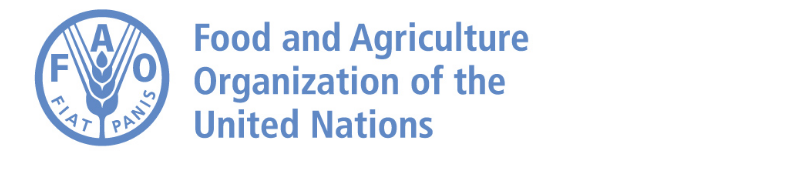

## Importation de Pandas

In [192]:
import pandas as pd

## Création de mes Dataframe

Pour cela rien de plus simple, j'utilise la méthode .read_csv() et je sauvegarde chaque Dataframe dans une variable.

In [193]:
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")
population = pd.read_csv("population.csv")
sous_nutrition = pd.read_csv("sous_nutrition.csv")

Parfait mes dataframes sont créés , pour les voir il me suffit d' "appeler" les variables auxquelles je les ai associés. 

In [194]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [195]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [196]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [197]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


Tout semble s'être bien passé en ce qui concerne l'importation des ficher csv. Passons à la première question.

# <u>Première question : Quelle est la proportion de personnes en état de sous-nutrition pour l'année 2017 ?</u>

Pour répondre à cette question, nous devons au préalable nous en poser deux autres:<ul>

<li> Quelles est **le nombre de personne en sous alimentation dans le monde** en 2017 ?</li>
<li> De combien d'individus se compose **la population mondiale en 2017** ?</li>

## <u>A ) Quelles est le nombre de personne en sous alimentation dans le monde en 2017 ?</u>
Pour repondre à cette question nous aurons besoin du tableau **"sous_nutrition"**

In [198]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


Conformément au indication de Julien ce tableau inclut :

-	Le pays.
-	Intervalle d’années.
-	Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour l’intervalle 2016-2018, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2017).
 
 Nous allons donc nous concentrer sur la période **" 2016-2018"** et créer un **" subset "** comprenant les données de la sous_alimentaition que nous sauvegarderons dans une variable appelée **"ss_nut_2017"**.

Commençons par changer le nom des colonnes afin que ces dernières soient bien plus explicites avec la méthode '.rename'

In [199]:
sous_nutrition = sous_nutrition.rename(columns={"Zone": "Pays", "Valeur":"Individus en millions d'hab."})

In [200]:
sous_nutrition.head()

,Pays,Année,Individus en millions d'hab.
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


Nous allons nous concentrer sur la période **" 2016-2018"** et créer un " subset " comprenant les données de la sous_alimentaition que nous sauvegarderons dans une variable appelée **"ss_nut_2017"** .

In [201]:
ss_nut_2017 = sous_nutrition.loc[sous_nutrition["Année"]== "2016-2018"]
ss_nut_2017.head()

,Pays,Année,Individus en millions d'hab.
4,Afghanistan,2016-2018,10.5
10,Afrique du Sud,2016-2018,3.1
16,Albanie,2016-2018,0.1
22,Algérie,2016-2018,1.3
28,Allemagne,2016-2018,NaN


Nous voyons que nous avons obtenu pour chaque pays les valeurs en millions d'habitants pour la periode **2016-2018**.

Dans un soucis de lisibilité, il serait peut-être plus judicieux de **changer** la formulation **"2016-2018" pour "2017"**

In [202]:
ss_nut_2017 = ss_nut_2017.replace("2016-2018", 2017)
ss_nut_2017.head()

,Pays,Année,Individus en millions d'hab.
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
28,Allemagne,2017,NaN


Le prochain problème a traiter est celui des valeur nulles:

Commencons par identifier les pays pour lequels nous n'avons aucunes information concernant les individus en sous alimentation en millions d'habitants

In [203]:
ss_nut_2017.isnull().sum()

Pays                             0
Année                            0
Individus en millions d'hab.    99
dtype: int64

Nous avons **99 valeurs manquantes** dans la colonne Individus en millions d'hab.

In [204]:
ss_nut_2017.loc[ss_nut_2017["Individus en millions d'hab."].isnull(),: ].head()

,Pays,Année,Individus en millions d'hab.
28,Allemagne,2017,NaN
34,Andorre,2017,NaN
46,Antigua-et-Barbuda,2017,NaN
70,Australie,2017,NaN
76,Autriche,2017,NaN


Dès les premières lignes on peut se rendre compte que les pays pour lesquels nous n'avons pas de valeur **semblent êtres des pays riches** avec par exemple l'Allemagne , Andorre, l'australie, l'autriche etc ... La tentation est grande ici, de remplacer ces valeurs nuls par 0 .

Mais c'est sans compter des pays comme **l'Erythrée , la Guinée , le Yemen, le Niger , l'Ouganda et bien d'autre pays pauvre présent dans cette liste**.

Nous ne tiendrons pas commpte des valeurs nulles dans notre calcul nous utiliserons la methode **'.skipna'**, ce qui aura le **même impact que remplacer ces valeurs par 0 tout en ayant l'avantage d'être plus honnête**.

Occupons nous **des types de données**. Dans le language Python presque tout est un objet et ces objets ont des types : on peut avoir des chaines de caractères ou string, des décimaux ou float, des nombre entiers ou int. On vérifie que chaque colonne est bien associée au bon type. **C' est primordiale pour la compréhension des données** 

In [205]:
ss_nut_2017.dtypes

Pays                            object
Année                            int64
Individus en millions d'hab.    object
dtype: object

Ici on peut voir qu'à la colonne **"Individus en millions d'hab."** est associé un type **"object"**. Changeons cela pour un type **"float"**.

In [206]:
ss_nut_2017.astype({"Individus en millions d'hab.": "float"})

ValueError: could not convert string to float: '<0.1'

Ah mince ! La ligne de code à provoquer une erreur : **"could not convert string to float: '<0.1"**. On peut facilement comprendre, maintenant, pourquoi le type de la colonne **"Individus en millions d'hab."** était **object**. Certaines lignes ont pour valeur **"<0.1"**. Affichons les !

In [207]:
ss_nut_2017.loc[ss_nut_2017["Individus en millions d'hab."] == '<0.1']

,Pays,Année,Individus en millions d'hab.
64,Arménie,2017,<0.1
106,Barbade,2017,<0.1
124,Belize,2017,<0.1
196,Cabo Verde,2017,<0.1
232,Chine - RAS de Macao,2017,<0.1
250,Chypre,2017,<0.1
310,Dominique,2017,<0.1
382,Fidji,2017,<0.1
466,Guyana,2017,<0.1
502,Îles Salomon,2017,<0.1


Remplaçons les !

In [208]:
ss_nut_2017 = ss_nut_2017.replace("<0.1",0)

On procède maintenant au changement de type: 

In [209]:
ss_nut_2017["Individus en millions d'hab."] = ss_nut_2017["Individus en millions d'hab."].astype("float")

In [210]:
tot_pop_sn_2017 = ss_nut_2017["Individus en millions d'hab."].sum(skipna=True)*1000000
print('Population en état de sous-alimentation: ' + str(tot_pop_sn_2017))

Population en état de sous-alimentation: 535700000.00000006


En 2017, cinq cent trente sept millions sept cent mille (537.700.000) personnes étaient en état de sous-nutrition.

## <u> B ) De combien d'individus se compose la population mondiale en 2017 ?<u/>

Pour cette question nous aurons besoin du dataframe "**population**".

In [211]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


On procède au changement du nom des colonnes grace à la méthode **.rename()**.

In [212]:
population = population.rename(columns={"Zone": "Pays", "Valeur":"Individus en milliers d'hab."})
population.head()

,Pays,Année,Individus en milliers d'hab.
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


Comme pour la population en état de sous-nutrition ce qui nous interesse ici est de connaitre la population mondiale en 2017. On va créer un dataframe **pop_2017 qui ne gardera que les chiffres dont nous avons besoin.**

In [213]:
pop_2017 = population.loc[population['Année'] == 2017]
pop_2017.head()

,Pays,Année,Individus en milliers d'hab.
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


Parfait, tout se passe comme prévu ! Vérifions que nous n'avons pas de **valeurs nulles** avec la combinaison des méthodes **.isnull() et .sum()**

In [214]:
pop_2017.isnull().sum()

Pays                            0
Année                           0
Individus en milliers d'hab.    0
dtype: int64

Aucune valeur nulle ! Vérifions que nous n'avons pas de **doublons** dans ce dataframe grace à la compbinaison de méthodes **.duplicated() et .sum()**

In [215]:
pop_2017.duplicated().sum()

0

Parfait ! Aucun doublons, il aurait été malheureux de compter la population d'un même pays, plus d'une fois.

In [216]:
pop_mond_2017=round(pop_2017["Individus en milliers d'hab."].sum()* 1000,2)
pop_mond_2017

7548134111.0

In [217]:
print('Population mondiale en 2017: ' + str(pop_mond_2017))

Population mondiale en 2017: 7548134111.0


# <u> Conclusion</u>

Nous avons maintenant répondu aux deux questions préliminaires, nécéssaires afin de savoir quelle est la proportion de la popuLation mondiale en état de sous-nutrition en 2017.
Le calcul est simple : il s'agit du rapport **population en sous-nutrition en 2017 divisé par la population mondiale** .

In [218]:
Pourcentage_ss_nut_2017 = round((tot_pop_sn_2017 / pop_mond_2017)*100,2)
print("Proportion de la population mondiale en état de sous nutrition:", Pourcentage_ss_nut_2017, "%")

Proportion de la population mondiale en état de sous nutrition: 7.1 %


# <u> Deuxième question : Quel est le  nombre théorique de personnes qui pourraient être nourries en 2017 ?</u>

Pour cette question nous aurons besoin des df **"dispo_alimentaire"** et **pop_2017**.

In [219]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


Comme pour le df **sous_nutrition**, procédons au renommage des colonnes.

In [220]:
dispo_alimentaire = dispo_alimentaire.rename(columns={"Zone" : "Pays"})

Passons au cribles **les types de données** de ce df.

In [221]:
dispo_alimentaire.dtypes

Pays                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

Tout est en ordre !

Etant donnée que nous devons établir une proportion par rapport à la population mondiale, nous aurons besoin de procéder à un **.merge()** des deux df.

Mais avant et dans un soucis de lisibilité, il nous faut un tableau de disponibilité alimentaire par pays. Pour ce faire, on utilisera la combinaison des méthodes **.grouby() et .sum().**

In [222]:
dispo_alim_par_pays = dispo_alimentaire.groupby("Pays").sum()
dispo_alim_par_pays

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


Ok ! Pour répondre à cette question, nous n'avons pas **besoin de la totalité des colonnes du df dispo_alimentaire**. Les seul colonnes dont nous avons besoin sont celles du **Pays et de la Disponibilité alimentaire en Kcal par personne et par jour.**

In [223]:
dispo_alim_groupby = dispo_alimentaire.groupby("Pays")["Pays","Disponibilité alimentaire (Kcal/personne/jour)"].sum()
dispo_alim_groupby.head()

<ipython-input-223-8ad1bfe612d1>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0


Bien, nous disposons maintenant d'un tableau lisible. Il expose clairement **la disponibilité alimentaire pour chaque pays**. Ce qu'il nous reste à faire est **d'associer ce tableau nouvellement créé à celui contenant le nombre d'habitant par pays**. Il faut toutefois noter que les deux df ont un nombre de lignes différents. Le df dispo_alimentaire est composé **de 174 lignes, tandis que le df pop_2017 est composé de 236 lignes**. Ce qui veut dire qu'il y aura forcément des lignes qui ne matcheront pas. en d'autres mots: **des pays pour lesquels nous disposons d'informations en ce qui concerne leurs population mais pas la disponibilité alimentaire.**

Ce qui serait judicieux de faire est de procéder à une **jointure externe afin de pouvoir reconnaitre les Pays pour lesquels nous ne disposons pas d'informations et de sauvegarder ces données dans une variable.**

In [224]:
dispo_alim_par_pays_outer=pd.merge(dispo_alim_groupby, pop_2017, on='Pays', how='outer', indicator= True)
pays_sans_info = dispo_alim_par_pays_outer.loc[(dispo_alim_par_pays_outer["_merge"]=="right_only")|(dispo_alim_par_pays_outer["_merge"]=="left_only")]
pays_sans_info

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Individus en milliers d'hab.,_merge
126,Royaume-Uni,3425.0,NaN,NaN,left_only
152,Tchéquie (la),3255.0,NaN,NaN,left_only
174,Andorre,NaN,2017.0,77.001,right_only
175,Anguilla,NaN,2017.0,14.584,right_only
176,Antilles néerlandaises (ex),NaN,2017.0,275.186,right_only
...,...,...,...,...,...
233,Soudan du Sud,NaN,2017.0,10910.763,right_only
234,Tchéquie,NaN,2017.0,10641.034,right_only
235,Tokélaou,NaN,2017.0,1.300,right_only
236,Tonga,NaN,2017.0,101.998,right_only


Nous allons ensuite associer ces deux tableaux avec un **.merge() inner afin  que n'apparaise uniquement les rangées qui se correspondent**

In [225]:
dispo_alim_par_pays_inner=pd.merge(dispo_alim_groupby, pop_2017, on='Pays', how='inner')
dispo_alim_par_pays_inner

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Individus en milliers d'hab.
0,Afghanistan,2087.0,2017,36296.113
1,Afrique du Sud,3020.0,2017,57009.756
2,Albanie,3188.0,2017,2884.169
3,Algérie,3293.0,2017,41389.189
4,Allemagne,3503.0,2017,82658.409
...,...,...,...,...
167,Émirats arabes unis,3275.0,2017,9487.203
168,Équateur,2346.0,2017,16785.361
169,États-Unis d'Amérique,3682.0,2017,325084.756
170,Éthiopie,2129.0,2017,106399.924


Pour repondre à cette question nous aurons besoin de procéder en **trois étapes** : d'abord  connaitre **la disponiblité alimentaire en Kcal/jour de chaque pays relativement à son nombre d'habitant.** 
Ensuite, **additionner toutes ces données** pour obtenir la disponibilité mondiale par jour.
Puis enfin **multiplier le nombre obtenu par 365** afin d'obtenir **la disponibilité alimentaire mondiale par année**. 
Commençons!

Pour connaitre la **disponiblité alimentaire en Kcal/jour de chaque pays relativement à son nombre d'habitant**, il suffit de créer une nouvelle colonne qui sera **le résultat de la multiplication de la Disponibilité alimentaire (Kcal/personne/jour) et du nombre d'habitants.**

In [226]:
dispo_alim_par_pays_inner["kcal/jour"]= dispo_alim_par_pays_inner["Disponibilité alimentaire (Kcal/personne/jour)"]* (dispo_alim_par_pays_inner["Individus en milliers d'hab."]*1000)
dispo_alim_par_pays_inner.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Individus en milliers d'hab.,kcal/jour
0,Afghanistan,2087.0,2017,36296.113,7.574999e+10
1,Afrique du Sud,3020.0,2017,57009.756,1.721695e+11
2,Albanie,3188.0,2017,2884.169,9.194731e+09
3,Algérie,3293.0,2017,41389.189,1.362946e+11
4,Allemagne,3503.0,2017,82658.409,2.895524e+11


Chaque ligne de la colonne **Kcal/jour renvoit à la disponibilité alimentaire de chaque pays /jour relativement à son nombre d'habitant**. Deuxième étape : **additionner toutes ces données afin d'avoir la disponibilité alimentaire mondiale par jour**

In [227]:
dispo_alim_mondiale_par_jour=dispo_alim_par_pays_inner["kcal/jour"].sum(skipna=True)
print( " La disponibilité alimentaire mondiale par jour est de :",  dispo_alim_mondiale_par_jour, "Kcal/jour")

 La disponibilité alimentaire mondiale par jour est de : 20918984627331.0 Kcal/jour


Multiplions ce nombre **par 365 afin de connaitre la disponibilité alimentaire mondiale sur l'année 2017**.

In [228]:
 dispo_alim_mondiale_2017 =dispo_alim_mondiale_par_jour*365

In [229]:
print ( "La disponibilité alimentaire 2017 est de :" , dispo_alim_mondiale_2017, "Kcal.")

La disponibilité alimentaire 2017 est de : 7635429388975815.0 Kcal.


Afin de savoir quel est **le nombre théorique de personnes qui pourraient être nourries en 2017**. Il faut opposer la disponibilité alimentaire mondiale de 2017 en Kcal **au besoin calorique en Kcal de la population mondiale de 2017**.
D'après la **F.A.O les besoins journaliers en Kcal d'un être humain sont d'environs 2200 Kcal**.

In [230]:
besoin_calorique_journaliers_en_kcal= 2200

Le besoin calorique mondiale en 2017 est donc **de 2200 fois la population mondiale de 2017 fois trois cent soixante cinq jours**

In [231]:
besoin_calorique_mondiale_2017= besoin_calorique_journaliers_en_kcal*pop_mond_2017*365

In [232]:
besoin_calorique_mondiale_2017

6061151691133000.0

In [233]:
Nb_theorique=round((dispo_alim_mondiale_2017/besoin_calorique_mondiale_2017)*pop_mond_2017,2)
Nb_theorique

9508629376.06

# <u>Troisième question : Le nombre théorique de personnes qui pourraient être nourries en 2017 grace au produit vegetaux ?</u>

Nous suivrons ici le même raisonnement que pour la question précédente

In [234]:
dispo_alimentaire_vegetale = dispo_alimentaire.loc[dispo_alimentaire["Origine"]=="vegetale"]
dispo_alimentaire_vegetale.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN


In [235]:
dispo_alimentaire_vegetale_par_pays= dispo_alimentaire_vegetale.groupby("Pays").sum()
dispo_alimentaire_vegetale_par_pays

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,
Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0
Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0
États-Unis d'Amérique,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0


In [236]:
dispo_alimentaire_vegetale_groupby=dispo_alimentaire_vegetale.groupby("Pays")["Pays","Disponibilité alimentaire (Kcal/personne/jour)"].sum()

<ipython-input-236-4682c6249acf>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [237]:
dispo_alim_vege_par_pays_inner= pd.merge(dispo_alimentaire_vegetale_groupby, pop_2017, on='Pays', how='inner')
dispo_alim_vege_par_pays_inner.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Individus en milliers d'hab.
0,Afghanistan,1871.0,2017,36296.113
1,Afrique du Sud,2533.0,2017,57009.756
2,Albanie,2203.0,2017,2884.169
3,Algérie,2915.0,2017,41389.189
4,Allemagne,2461.0,2017,82658.409


In [238]:
dispo_alim_vege_par_pays_inner["kcal/jour"]= dispo_alim_vege_par_pays_inner["Disponibilité alimentaire (Kcal/personne/jour)"]* (dispo_alim_par_pays_inner["Individus en milliers d'hab."]*1000)
dispo_alim_vege_par_pays_inner.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Individus en milliers d'hab.,kcal/jour
0,Afghanistan,1871.0,2017,36296.113,6.791003e+10
1,Afrique du Sud,2533.0,2017,57009.756,1.444057e+11
2,Albanie,2203.0,2017,2884.169,6.353824e+09
3,Algérie,2915.0,2017,41389.189,1.206495e+11
4,Allemagne,2461.0,2017,82658.409,2.034223e+11


In [243]:
dispo_alim_vege_mondiale_par_jour= dispo_alim_vege_par_pays_inner["kcal/jour"].sum(skipna=True)
dispo_alim_vege_mondiale_par_jour

17260764211501.0

In [244]:
dispo_alim_vege_mondiale_2017= dispo_alim_vege_mondiale_par_jour* 365
dispo_alim_vege_mondiale_2017

6300178937197865.0

In [245]:
quotient= dispo_alim_vege_mondiale_2017/besoin_calorique_mondiale_2017
quotient

1.0394359452205335

Le fait que ce quotient soit supérieur à 1 démontre que plus de 100 % de la population mondiale pourrait être nourries grace à la disponibilité alimentaire végétale. 

In [246]:
pop_mond_2017*quotient

7845801914.318636

# <u>Quatrième question: Comment est utilisée de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine ?</u>

Pour répondre à cette question nous utliserons le df **dispo_alimentaire**.

In [247]:
dispo_alimentaire

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


**Groupement par pays**

In [248]:
dispo_alimentaire.groupby("Pays").sum()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


In [249]:
disponibilité_interieure_mondiale =dispo_alimentaire["Disponibilité intérieure"].sum()
print( "La disponibilité interieure mondiale en milliers de tonnes est égale à :", disponibilité_interieure_mondiale)

La disponibilité interieure mondiale en milliers de tonnes est égale à : 9848994.0


In [250]:
part_animaux = round((dispo_alimentaire["Aliments pour animaux"].sum()/ disponibilité_interieure_mondiale),2)*100
print ("La proportion attribuée au animaux est de :", part_animaux, "%")

La proportion attribuée au animaux est de : 13.0 %


In [251]:
part_perdue = round((dispo_alimentaire["Pertes"].sum()/ disponibilité_interieure_mondiale),2)*100
print ("La proportion perdue de :" , part_perdue,"%")

La proportion perdue de :, 5.0 %


In [252]:
part_alim_humaine = round ((dispo_alimentaire["Nourriture"].sum()/ disponibilité_interieure_mondiale),2)*100
print ("La proportion attribuée à l'alimentation humaine est de :", part_alim_humaine, "%")

La proportion attribuée à l'alimentation humaine est de : 50.0 %


# Question de Melanie

#  Première question : Quels sont les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017.

Pour répondre à cette question on aura besoin des df ss_nut_2017 et pop_2017 que l'on va associer

In [253]:
ss_nut_2017.shape, pop_2017.shape

((203, 3), (236, 3))

Etant donnée le nombre de lignes des deux df nous aurons au moins 33 élements qui ne matcheront pas.

In [254]:
merge_ss_nut_pop_2017= pd.merge(ss_nut_2017, pop_2017, on='Pays', how='inner')
merge_ss_nut_pop_2017

,Pays,Année_x,Individus en millions d'hab.,Année_y,Individus en milliers d'hab.
0,Afghanistan,2017,10.5,2017,36296.113
1,Afrique du Sud,2017,3.1,2017,57009.756
2,Albanie,2017,0.1,2017,2884.169
3,Algérie,2017,1.3,2017,41389.189
4,Allemagne,2017,NaN,2017,82658.409
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8.0,2017,29402.484
199,Viet Nam,2017,6.5,2017,94600.648
200,Yémen,2017,NaN,2017,27834.819
201,Zambie,2017,NaN,2017,16853.599


In [306]:
pop_2017

,Pays,Année,Individus en milliers d'hab.
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [310]:
merge_ss_nut_pop_2017["prop. de la pop en ss-alim."]= round((merge_ss_nut_pop_2017["Individus en millions d\'hab."]*1000000) / (merge_ss_nut_pop_2017["Individus en milliers d\'hab."]*1000),2)*100
merge_ss_nut_pop_2017

,Pays,Année_x,Individus en millions d'hab.,Année_y,Individus en milliers d'hab.,prop. de la pop en ss-alim.
0,Afghanistan,2017,10.5,2017,36296.113,29.0
1,Afrique du Sud,2017,3.1,2017,57009.756,5.0
2,Albanie,2017,0.1,2017,2884.169,3.0
3,Algérie,2017,1.3,2017,41389.189,3.0
4,Allemagne,2017,NaN,2017,82658.409,NaN
...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8.0,2017,29402.484,27.0
199,Viet Nam,2017,6.5,2017,94600.648,7.0
200,Yémen,2017,NaN,2017,27834.819,NaN
201,Zambie,2017,NaN,2017,16853.599,NaN


In [311]:
merge_ss_nut_pop_2017.sort_values("prop. de la pop en ss-alim.", ascending= False).head(10)

,Pays,Année_x,Individus en millions d'hab.,Année_y,Individus en milliers d'hab.,prop. de la pop en ss-alim.
78,Haïti,2017,5.3,2017,10982.366,48.0
157,République populaire démocratique de Corée,2017,12.0,2017,25429.825,47.0
108,Madagascar,2017,10.5,2017,25570.512,41.0
100,Lesotho,2017,0.8,2017,2091.534,38.0
103,Libéria,2017,1.8,2017,4702.226,38.0
183,Tchad,2017,5.7,2017,15016.753,38.0
161,Rwanda,2017,4.2,2017,11980.961,35.0
121,Mozambique,2017,9.4,2017,28649.018,33.0
186,Timor-Leste,2017,0.4,2017,1243.258,32.0
0,Afghanistan,2017,10.5,2017,36296.113,29.0


Ci-dessus, **un top 10 des populations qui présentent les proportions les plus élevés de sous-nutritions**. Les résultats sont à peines croyables... **Haïti est en première position** avec près de la moitié de sa population soit plus de **2 millions de personnes** en état de sous nutrition...

# Deuxième question : Quels sont les pays  qui ont bénéficié du plus d’aide depuis 2013 ?

Pour répondre à cette question nous auront besoin du df **aide_alimentaire**

In [312]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


Jetons un oeil au **type de données**

In [73]:
aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

Procédons au changement de type de la colonne année

In [74]:
aide_alimentaire["Année"] = aide_alimentaire["Année"].astype("object")
aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                object
Produit              object
Valeur                int64
dtype: object

In [75]:
aide_alimentaire.groupby('Pays bénéficiaire').sum().sort_values("Valeur",ascending=False).head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


Grace à la combinaison des méthodes **. sum(), sort_values()et head()** nous pouvons voir **un Top 10 des Pays ayant reçu le plus d'aide depuis 2013.**

 # Troisième question : Quels sont les pays ayant le plus/le moins de disponibilité/habitant ? 

Voilà une question à laquelle **nous avons déjà répondu**, il s'agissait d'une étape pour la résolution d'un problème plus grand. La réponse se cache dans le df **dispo_alim_par_pays_inner**. Il suffira de faire un **.sort_values() décroissant**.
Un **.head(10)** nous donnera les 10 premières valeurs tandis qu'un **.tail(10)** nous donnera les 10 dernières.

In [257]:
dispo_alim_par_pays_inner.sort_values("kcal/jour", ascending= False).head(10)

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Individus en milliers d'hab.,kcal/jour
36,"Chine, continentale",3112.0,2017,1421021.791,4.422220e+12
68,Inde,2454.0,2017,1338676.785,3.285113e+12
169,États-Unis d'Amérique,3682.0,2017,325084.756,1.196962e+12
69,Indonésie,2776.0,2017,264650.963,7.346711e+11
23,Brésil,3262.0,2017,207833.823,6.779539e+11
108,Nigéria,2700.0,2017,190873.244,5.153578e+11
116,Pakistan,2438.0,2017,207906.209,5.068753e+11
54,Fédération de Russie,3360.0,2017,145530.082,4.889811e+11
14,Bangladesh,2453.0,2017,159685.424,3.917083e+11
100,Mexique,3068.0,2017,124777.324,3.828168e+11


In [82]:
dispo_alim_par_pays_inner.sort_values("kcal/jour", ascending= False).tail(10)

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Individus en milliers d'hab.,kcal/jour
137,Samoa,2956.0,2017,195.352,577460512.0
138,Sao Tomé-et-Principe,2398.0,2017,207.089,496599422.0
136,Sainte-Lucie,2589.0,2017,180.954,468489906.0
82,Kiribati,3042.0,2017,114.158,347268636.0
135,Saint-Vincent-et-les Grenadines,2965.0,2017,109.827,325637055.0
58,Grenade,2442.0,2017,110.874,270754308.0
6,Antigua-et-Barbuda,2416.0,2017,95.426,230549216.0
46,Dominique,2930.0,2017,71.458,209371940.0
18,Bermudes,2668.0,2017,63.049,168214732.0
134,Saint-Kitts-et-Nevis,2491.0,2017,52.045,129644095.0


# Interrogation relative au Taux d’ autosuffisance (TAS) 

**Le taux d’autosuffisance alimentaire est un indice permettant de mesurer l’importance de la production alimentaire d’un pays par rapport à sa consommation intérieure. La question de l’autosuffisance alimentaire n’est pas sans importance, vu la possibilité, qu’il ne faut pas exclure, d’une crise ou d’une situation de pénurie.**

Il se calcule de la manière suivante : **[Production/(Production+Importations-Exportations)]*100**

In [79]:
dispo_alimentaire

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [85]:
dispo_alim_par_pays = dispo_alimentaire.groupby("Pays").sum()
dispo_alim_par_pays

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


In [258]:
dispo_alim_par_pays["TAS"]=(dispo_alim_par_pays["Production"]/(dispo_alim_par_pays["Production"]+dispo_alim_par_pays["Importations - Quantité"]- dispo_alim_par_pays["Exportations - Quantité"]))*100

In [259]:
dispo_alim_par_pays.sort_values("TAS", ascending= False).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,TAS
Pays,,,,,,,,,,,,,,,,
Nouvelle-Zélande,1733.0,1395.0,3136.0,844.04,115.87,92.39,8127.0,22805.0,2072.0,3799.0,362.0,26896.0,87.0,784.0,1972.0,436.410839
Islande,107.0,43.0,3381.0,923.29,151.35,133.06,474.0,1440.0,258.0,301.0,0.0,1657.0,1.0,21.0,-2.0,348.842105
Uruguay,1239.0,125.0,3052.0,779.63,105.83,92.33,4988.0,8179.0,1213.0,2658.0,531.0,11587.0,183.0,280.0,372.0,250.746592
Bulgarie,1055.0,535.0,2828.0,707.76,93.99,83.41,9458.0,9466.0,2293.0,5111.0,1090.0,15564.0,357.0,1312.0,1077.0,185.484448
Australie,9236.0,3032.0,3278.0,941.76,150.81,106.26,66992.0,43184.0,5879.0,21988.0,520.0,100956.0,1098.0,31148.0,3339.0,158.608663
Paraguay,3657.0,969.0,2584.0,610.98,92.59,70.58,17016.0,10059.0,523.0,4158.0,1823.0,27321.0,215.0,6202.0,-771.0,153.618218
Costa Rica,813.0,170.0,2846.0,681.79,90.42,75.05,10049.0,6291.0,2099.0,3320.0,1058.0,14004.0,52.0,4834.0,237.0,142.723196
Lituanie,1933.0,416.0,3414.0,1050.07,94.44,124.36,7467.0,5963.0,3060.0,3169.0,147.0,9761.0,381.0,1426.0,616.0,142.330125
Argentine,7890.0,4194.0,3226.0,784.96,116.46,102.60,114369.0,52333.0,1212.0,32531.0,3522.0,176124.0,2416.0,63983.0,-10632.0,140.895819


La **Nouvelle-Zélande et l'Islande** tiennent le haut du classement ces pays environs 4 fois plus d'aliment qu'ils n'en consomment. Ils sont **hautement autosuffisant** !

In [329]:
dispo_alim_par_pays.sort_values("TAS", ascending= False).tail(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,TAS,TDI,Proportion exportation
Pays,,,,,,,,,,,,,,,,,,
Arabie saoudite,11841.0,159.0,3255.0,622.78,107.83,91.59,31274.0,4707.0,27726.0,17956.0,1040.0,8878.0,97.0,601.0,-628.0,27.833339,86.923535,53.018698
Trinité-et-Tobago,88.0,37.0,3049.0,661.16,92.55,83.33,1072.0,95.0,898.0,888.0,19.0,275.0,3.0,32.0,-10.0,25.510204,83.302412,34.545455
Antigua-et-Barbuda,0.0,20.0,2416.0,694.17,89.76,83.49,79.0,0.0,63.0,58.0,0.0,20.0,0.0,0.0,-7.0,24.096386,75.903614,0.000000
Brunéi Darussalam,9.0,15.0,2985.0,640.91,82.46,93.29,294.0,11.0,244.0,261.0,4.0,60.0,1.0,0.0,-2.0,20.477816,83.276451,18.333333
Koweït,522.0,93.0,3499.0,908.82,116.87,108.15,3824.0,467.0,3690.0,3061.0,159.0,636.0,4.0,1.0,-29.0,16.480954,95.620627,73.427673
Bermudes,1.0,22.0,2668.0,840.70,109.93,90.36,59.0,24.0,77.0,51.0,0.0,6.0,0.0,0.0,0.0,10.169492,130.508475,400.000000
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,9.789750,125.878778,364.345638
Chine - RAS de Hong-Kong,100.0,312.0,3286.0,802.17,139.82,129.07,6424.0,3604.0,9510.0,5778.0,216.0,470.0,2.0,11.0,44.0,7.371393,149.153074,766.808511
Djibouti,0.0,119.0,2609.0,454.14,59.85,65.62,526.0,113.0,1628.0,393.0,10.0,76.0,0.0,0.0,-1064.0,4.776870,102.325581,148.684211


La Région administrative spéciale chinoise de **MACAO** arrive bonne dernière du classement avec un **TAS inférieure à 5 %**

# Taux de dépendance des importation (TDI)

La signification du TDI va sans dire il se calcul de la façon suivante :**[Importations/(Production+Importations-Exportations)]*100**

In [260]:
dispo_alim_par_pays["TDI"]=(dispo_alim_par_pays["Importations - Quantité"]/(dispo_alim_par_pays["Production"]+dispo_alim_par_pays["Importations - Quantité"]- dispo_alim_par_pays["Exportations - Quantité"]))*100
dispo_alim_par_pays

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,TAS,TDI
Pays,,,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,80.476911,21.525827
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,107.033127,12.717829
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,82.531751,19.425359
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,61.147841,40.371633
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,95.123993,40.224904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,9.789750,125.878778
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0,134.756368,9.551495
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0,110.041069,10.071818


In [98]:
dispo_alim_par_pays.sort_values("TDI", ascending=False).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,TDI,TAS
Pays,,,,,,,,,,,,,,,,,
Chine - RAS de Hong-Kong,100.0,312.0,3286.0,802.17,139.82,129.07,6424.0,3604.0,9510.0,5778.0,216.0,470.0,2.0,11.0,44.0,149.153074,7.371393
Bermudes,1.0,22.0,2668.0,840.70,109.93,90.36,59.0,24.0,77.0,51.0,0.0,6.0,0.0,0.0,0.0,130.508475,10.169492
Luxembourg,147.0,11.0,3540.0,1150.66,141.49,113.64,802.0,821.0,1076.0,607.0,11.0,593.0,9.0,24.0,-41.0,126.886792,69.929245
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,125.878778,9.789750
Pays-Bas,8991.0,4299.0,3222.0,1069.22,125.30,111.46,42461.0,52179.0,52910.0,17924.0,597.0,41636.0,403.0,10510.0,91.0,124.884934,98.274601
Belgique,5533.0,3226.0,3737.0,1002.09,161.95,99.37,29358.0,30345.0,35276.0,11134.0,564.0,24496.0,153.0,8960.0,-64.0,119.876304,83.243280
Djibouti,0.0,119.0,2609.0,454.14,59.85,65.62,526.0,113.0,1628.0,393.0,10.0,76.0,0.0,0.0,-1064.0,102.325581,4.776870
Oman,166.0,285.0,3140.0,821.33,90.30,88.21,3518.0,1217.0,3464.0,2984.0,113.0,1169.0,0.0,0.0,105.0,101.405152,34.221311
Chine - RAS de Macao,0.0,10.0,2915.0,655.38,126.18,94.75,383.0,2.0,367.0,368.0,1.0,16.0,0.0,3.0,2.0,96.325459,4.199475


**Hong-Kong** dépend fortement de ses importations tout comme **Luxembourg ou la Belgique par exemple.**

In [100]:
dispo_alim_par_pays.sort_values("TDI", ascending=False).tail(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,TDI,TAS
Pays,,,,,,,,,,,,,,,,,
Pakistan,4755.0,3087.0,2438.0,496.85,74.88,65.45,168631.0,9256.0,5561.0,90495.0,5897.0,172886.0,8443.0,56028.0,-557.0,3.286818,102.183922
République centrafricaine,1.0,27.0,1879.0,453.73,59.41,46.04,2582.0,0.0,76.0,2092.0,122.0,2503.0,63.0,278.0,3.0,2.946879,97.053121
Paraguay,3657.0,969.0,2584.0,610.98,92.59,70.58,17016.0,10059.0,523.0,4158.0,1823.0,27321.0,215.0,6202.0,-771.0,2.940680,153.618218
Cambodge,607.0,9428.0,2473.0,410.36,35.93,65.66,18839.0,793.0,477.0,6210.0,1984.0,18785.0,272.0,345.0,362.0,2.582706,101.710975
Myanmar,11663.0,4542.0,2574.0,484.24,69.42,82.61,59191.0,2669.0,1465.0,25793.0,2398.0,59939.0,1382.0,13418.0,455.0,2.494254,102.049885
République démocratique populaire lao,1018.0,2221.0,2455.0,632.20,38.86,68.89,8308.0,307.0,165.0,4280.0,435.0,8430.0,148.0,205.0,17.0,1.990830,101.713320
Malawi,4009.0,1296.0,2364.0,526.02,41.17,64.53,19877.0,366.0,395.0,8607.0,2428.0,19931.0,354.0,3191.0,-82.0,1.978958,99.854709
Inde,49129.0,15162.0,2454.0,494.93,52.49,59.91,1100838.0,40807.0,18954.0,619168.0,55930.0,1126270.0,29432.0,332123.0,-3573.0,1.716200,101.978691
Brésil,63740.0,367300.0,3262.0,779.79,117.72,95.01,1033314.0,126552.0,16817.0,156246.0,75914.0,1143605.0,2884.0,367282.0,-556.0,1.626607,110.614004


**Le Pakistan** quant à lui fait figure de meilleur élève en ce qui concerne le TDI .

# Interrogations de Julien

# Première interrogation : Quels est le lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes, qui peut s’exprimer avec une équation du type : A1 + A2 + … = disponibilité intérieure = B1 + B2 + … ?

D'après la FAO, il faut distinguer la consommation intérieure (aussi appelée utilisations) et la disponibilité intérieure (aussi appelée nourriture). A partir de ces informations, on peut en déduire que :

**Production + (importations - exportations) + variation de stocks = Disponibilité intérieure =aliment pour animaux + nourriture + semences + pertes + traitement + autres utilisations**

Nous uliserons ici l'exemple du blé italien pour vérifier l'exactitude de ces égalités

In [261]:
ble_italie = dispo_alimentaire.loc[(dispo_alimentaire['Pays'] == "Italie") & (dispo_alimentaire['Produit'] == 'Blé')]
ble_italie["Disponibilité intérieure"].sum()

11050.0

In [262]:
disponibilité_intérieure_italie=ble_italie["Disponibilité intérieure"].sum()
conso_int_fb = ble_italie['Aliments pour animaux'].sum() + ble_italie['Nourriture'].sum() + ble_italie['Semences'].sum() + ble_italie['Pertes'].sum() + ble_italie['Traitement'].sum() + ble_italie['Autres Utilisations'].sum()
print('Consommation intérieure de blé en Italie : ' + str(conso_int_fb))

Consommation intérieure de blé en Italie : 11050.0


In [263]:
prod_fb = ble_italie['Production'].sum() + (ble_italie['Importations - Quantité'].sum() - ble_italie['Exportations - Quantité'].sum()) + ble_italie['Variation de stock'].sum()
print('Production + imports/exports + variation de stock de blé en Italie : ' + str(prod_fb))

Production + imports/exports + variation de stock de blé en France : 11050.0


# Observation concernant l’utilisation des céréales: notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux. 

Création d'une liste regroupant les céréales

In [186]:
cereales= ['Blé', 'Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle']

Création d'un df regroupant les **disponibilité alimentaires des produits céréaliers**

In [187]:
dispo_cereales= dispo_alimentaire.loc[dispo_alimentaire["Produit"].isin(cereales)]
dispo_cereales

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,200.0,NaN,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13.0,NaN,NaN,12.0,1.0,13.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360.0,NaN,26.0,2.92,0.24,0.79,524.0,NaN,10.0,89.0,52.0,514.0,22.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
15568,Îles Salomon,Maïs,vegetale,NaN,NaN,1.0,0.15,0.01,0.03,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15575,Îles Salomon,Orge,vegetale,NaN,NaN,0.0,0.07,NaN,0.01,1.0,NaN,1.0,0.0,NaN,NaN,NaN,1.0,NaN
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,NaN,0.0


In [188]:
dispo_cereales["Disponibilité intérieure"].sum()

2406999.0

In [327]:
round(dispo_cereales["Aliments pour animaux"].sum() / dispo_cereales["Disponibilité intérieure"].sum()*100,2)

36.29

In [328]:
round(dispo_cereales["Nourriture"].sum() / dispo_cereales["Disponibilité intérieure"].sum()*100,2)

42.75

# Observation relative à l'utilisation du manioc par la Thaïlande

In [264]:
dispo_alimentaire

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Création d'un dataframe "thailande" derivé du df dispo_alimentaire concernant la thailande et le manioc.

In [265]:
thailande = dispo_alimentaire.loc[(dispo_alimentaire['Pays']=="Thaïlande")&(dispo_alimentaire["Produit"]=="Manioc")]
thailande

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [266]:
print("Proportion de manioc exportée par la Thaïlande :", thailande['Exportations - Quantité'].sum(), "milliers de tonnes.")

Proportion de manioc exportée par la Thaïlande : 25214.0 milliers de tonnes.


In [317]:
pop_thailande = pop_2017.loc[pop_2017['Pays']=="Thaïlande"]
print ( " Population Thailandaise :", pop_thailande["Individus en milliers d'hab."].sum()*1000)
pop_thailande

 Population Thailandaise : 69209810.0


,Pays,Année,Individus en milliers d'hab.
1312,Thaïlande,2017,69209.81


In [268]:
ss_nut_thailande = ss_nut_2017.loc[ss_nut_2017["Pays"]=="Thaïlande"]
ss_nut_thailande

,Pays,Année,Individus en millions d'hab.
1114,Thaïlande,2017,6.2


In [320]:
pct_ss_nut_thailande = round((6.2*1000000) /(69209810.0)*100 ,2)

In [321]:
print('Pourcentage de thaïlandais sous-alimentés : ' + str(pct_ss_nut_thailande) +'%')

Pourcentage de thaïlandais sous-alimentés : 8.96%


Julien a tout à fait raison, on peut s'intérroger sur **le choix que fait la Thailande d'exporter autant de Manioc** alors que plus d'**un Thailandais sur 10 est en état de sous nutrition** .

Mais la question que l'on pourrait se poser est de savoir s'il existe d'autres pays, qui malgrè un taux de sous-nutrition au moins aussi important, exportent une grande proportion de leur production ? 
Pour répondre à cette question c'est du df **dispo_alim_par_pays** dont on aura besoin. 

In [278]:
dispo_alim_par_pays

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,TAS,TDI
Pays,,,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,80.476911,21.525827
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,107.033127,12.717829
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,82.531751,19.425359
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,61.147841,40.371633
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,95.123993,40.224904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,9.789750,125.878778
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0,134.756368,9.551495
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0,110.041069,10.071818


On créer une colonne **"Proportion exportation"** resultat du rapport **des exportations sur la production.**

In [288]:
dispo_alim_par_pays ["Proportion exportation"] = (dispo_alim_par_pays["Exportations - Quantité"]/dispo_alim_par_pays["Production"])*100

In [290]:
dispo_alim_par_pays.sort_values("Proportion exportation", ascending=False).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,TAS,TDI,Proportion exportation
Pays,,,,,,,,,,,,,,,,,,
Chine - RAS de Hong-Kong,100.0,312.0,3286.0,802.17,139.82,129.07,6424.0,3604.0,9510.0,5778.0,216.0,470.0,2.0,11.0,44.0,7.371393,149.153074,766.808511
Bermudes,1.0,22.0,2668.0,840.70,109.93,90.36,59.0,24.0,77.0,51.0,0.0,6.0,0.0,0.0,0.0,10.169492,130.508475,400.000000
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,9.789750,125.878778,364.345638
Djibouti,0.0,119.0,2609.0,454.14,59.85,65.62,526.0,113.0,1628.0,393.0,10.0,76.0,0.0,0.0,-1064.0,4.776870,102.325581,148.684211
Luxembourg,147.0,11.0,3540.0,1150.66,141.49,113.64,802.0,821.0,1076.0,607.0,11.0,593.0,9.0,24.0,-41.0,69.929245,126.886792,138.448567
Pays-Bas,8991.0,4299.0,3222.0,1069.22,125.30,111.46,42461.0,52179.0,52910.0,17924.0,597.0,41636.0,403.0,10510.0,91.0,98.274601,124.884934,125.321837
Belgique,5533.0,3226.0,3737.0,1002.09,161.95,99.37,29358.0,30345.0,35276.0,11134.0,564.0,24496.0,153.0,8960.0,-64.0,83.243280,119.876304,123.877368
Oman,166.0,285.0,3140.0,821.33,90.30,88.21,3518.0,1217.0,3464.0,2984.0,113.0,1169.0,0.0,0.0,105.0,34.221311,101.405152,104.106074
Islande,107.0,43.0,3381.0,923.29,151.35,133.06,474.0,1440.0,258.0,301.0,0.0,1657.0,1.0,21.0,-2.0,348.842105,54.315789,86.904043


On peut se rendre compte que la **Chine exporte plus de 7 fois ce qu'elle produit** ! **Ce rapport est de 4 fois pour les Bermudes**

Utilisons le df **merge_ss_nut_pop_2017**

In [291]:
merge_ss_nut_pop_2017

,Pays,Année_x,Individus en millions d'hab.,Année_y,Individus en milliers d'hab.,prop. de la pop en ss-alim.
0,Afghanistan,2017,10.5,2017,36296.113,29.0
1,Afrique du Sud,2017,3.1,2017,57009.756,5.0
2,Albanie,2017,0.1,2017,2884.169,3.0
3,Algérie,2017,1.3,2017,41389.189,3.0
4,Allemagne,2017,NaN,2017,82658.409,NaN
...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8.0,2017,29402.484,27.0
199,Viet Nam,2017,6.5,2017,94600.648,7.0
200,Yémen,2017,NaN,2017,27834.819,NaN
201,Zambie,2017,NaN,2017,16853.599,NaN


merge avec le df **dispo alimentaire**

In [313]:
merge_ss_nut_pop_2017_dispo_alim= pd.merge(merge_ss_nut_pop_2017,dispo_alim_par_pays, on='Pays', how="inner" )
merge_ss_nut_pop_2017_dispo_alim= merge_ss_nut_pop_2017_dispo_alim [["Pays","prop. de la pop en ss-alim.","Proportion exportation"]]
merge_ss_nut_pop_2017_dispo_alim

,Pays,prop. de la pop en ss-alim.,Proportion exportation
0,Afghanistan,29.0,2.488587
1,Afrique du Sud,5.0,18.453124
2,Albanie,3.0,2.371342
3,Algérie,3.0,2.484920
4,Allemagne,NaN,37.160864
...,...,...,...
167,Venezuela (République bolivarienne du),27.0,0.259762
168,Viet Nam,7.0,20.907873
169,Yémen,NaN,17.430303
170,Zambie,NaN,6.412692


In [314]:
merge_ss_nut_pop_2017_dispo_alim.loc[merge_ss_nut_pop_2017_dispo_alim['Pays']=="Thaïlande"]

,Pays,prop. de la pop en ss-alim.,Proportion exportation
157,Thaïlande,9.0,24.994548


La thailande **a 9% de sa population en sous-nutrition** et exporte près **d'un quart de sa production**. Cherchons les pays qui dispose d'**au moins 5% de leur population en état de sous-nutrition** et qui exporte **plus d'un cinquième de leur production**

In [326]:
merge_ss_nut_pop_2017_dispo_alim.loc[(merge_ss_nut_pop_2017_dispo_alim["prop. de la pop en ss-alim."]>5)&(merge_ss_nut_pop_2017_dispo_alim["Proportion exportation"]>20)]


,Pays,prop. de la pop en ss-alim.,Proportion exportation
50,Équateur,9.0,32.879977
84,Jordanie,8.0,42.936198
92,Liban,6.0,25.686940
111,Namibie,12.0,51.226158
119,Oman,9.0,104.106074
124,Paraguay,9.0,36.817832
148,Slovaquie,6.0,52.293697
157,Thaïlande,9.0,24.994548
168,Viet Nam,7.0,20.907873


L'exemple **d'Oman est incroyable** ! On a un pays où **une personne sur 10 souffre de sous-nutrition** qui exporte plus de **100% de l'alimentation qu'il produit** !

# CONCLUSION :

Ce dont on se rend compte, pour conclure ce projet est que, les richesse alimentaire ne manque pas, que ce soit au niveau mondiale, comme à l'échelle des pays en eux même, mis à part quelques exceptions. 
La sous-nutrition nous apparaît plus comme le résultat d'une mauvaise répartition des denrées alimentaires